### Explanation of Ford GoBike System Data

I chose the Bay Wheels bicycle sharing service. This service is provided to supporting bicycling as an alternative transportation option. There is a lot of information within this dataset that I haven't expected to find. There are in total fourteen columns, and all issues were resolved. All findings will be titled as 'Findings #'. 



All the following imports are needed for running the code.

In [1]:
# all needed libraries imported here 
import pandas as pd
import numpy as np 
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

In [2]:

df_clean = pd.read_csv('master_fordgobike_tripdata.csv')

In [3]:
base_color = sb.color_palette()[0]

***TODO: fill it***

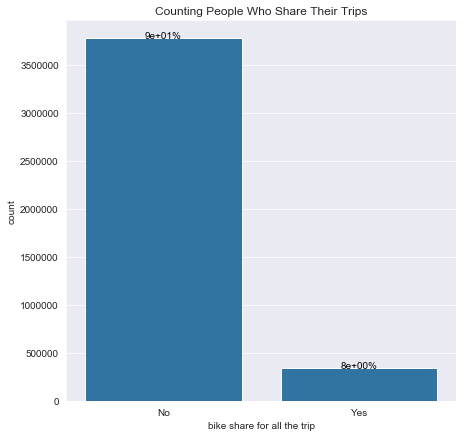

In [20]:
plt.figure(figsize=(7,7))
sb.countplot(data = df_clean, x='bike_share_for_all_trip', color = base_color)
plt.xlabel('bike share for all the trip')
plt.title('Counting People Who Share Their Trips')
n_points = df_clean.shape[0]
bike_share_counts = df_clean['bike_share_for_all_trip'].value_counts()
sb.set_style('darkgrid')
locs, labels = plt.xticks()

for loc,label in zip(locs, labels):
    
    count = bike_share_counts[label.get_text()]
    pct_string = '{:0.1}%'.format(100*count/n_points)
    
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'k')


***TODO: fill it***

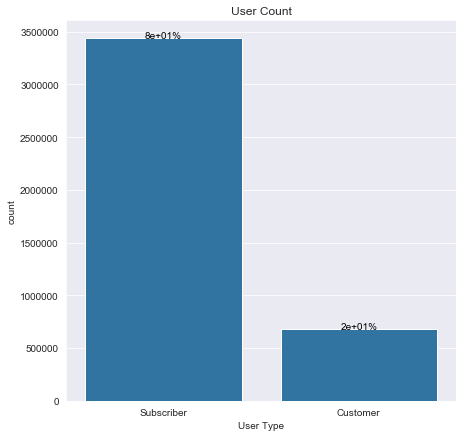

In [19]:
plt.figure(figsize=(7,7))
sb.countplot(data = df_clean, x='user_type', color = base_color )
plt.xlabel('User Type')
plt.title('User Count')
n_points = df_clean.shape[0]
bike_share_counts = df_clean['user_type'].value_counts()
locs, labels = plt.xticks()

for loc,label in zip(locs, labels):
    
    count = bike_share_counts[label.get_text()]
    pct_string = '{:0.1}%'.format(100*count/n_points)
    
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'k')

***TODO: fill it***

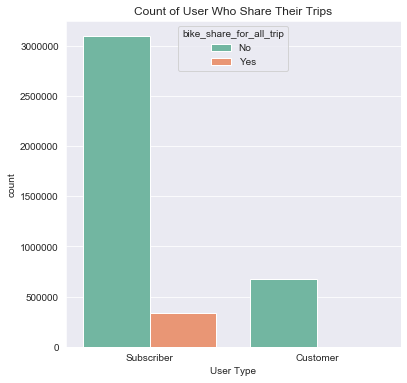

In [18]:
plt.figure(figsize=(6,6))
sb.countplot(data = df_clean, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Set2')
plt.title('Count of User Who Share Their Trips')
plt.xlabel('User Type');

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

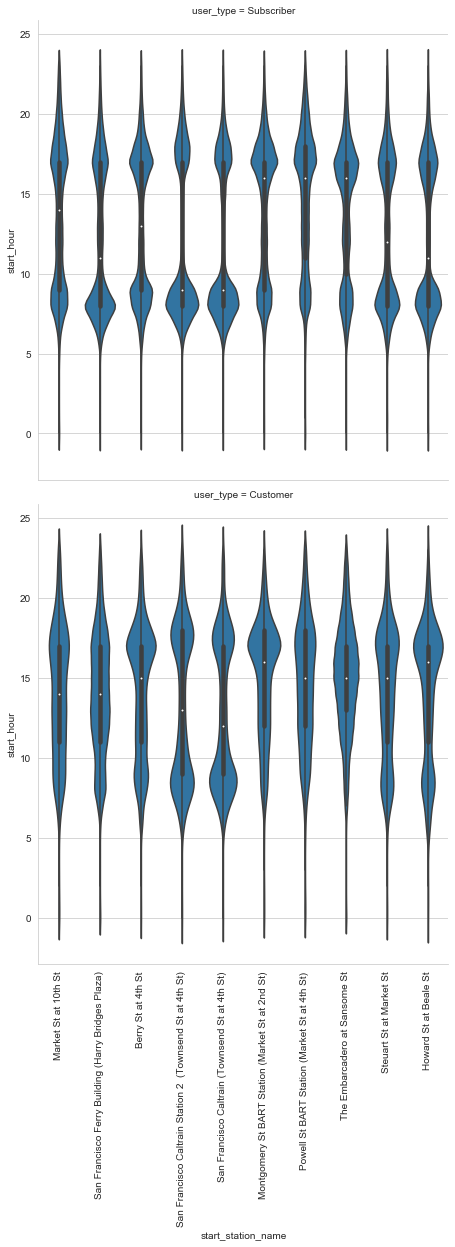

In [27]:
sb.set_style('whitegrid')
ordered_values = ordered_values = df_clean['start_station_name'].value_counts().sort_values(ascending =False)[:10].index
g = sb.FacetGrid(data = df_clean, col = 'user_type', height = 7, col_wrap = 1)
g.map(sb.violinplot, 'start_station_name',  'start_hour', order = ordered_values)
plt.xticks(rotation = 90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

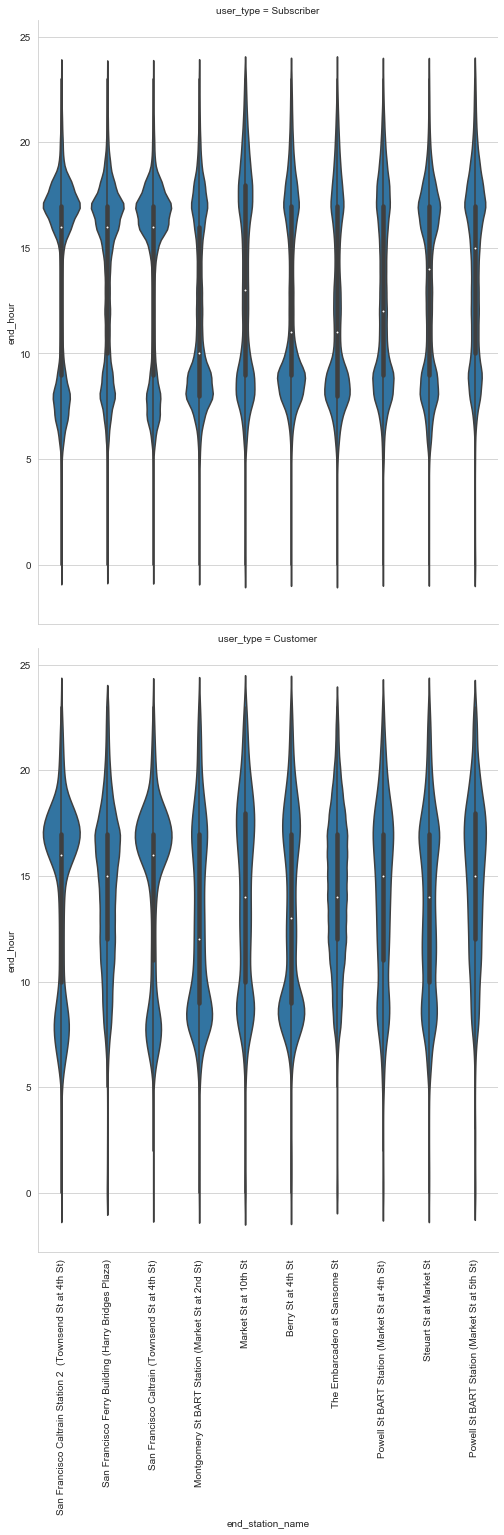

In [28]:
ordered_values = ordered_values = df_clean['end_station_name'].value_counts().sort_values(ascending =False)[:10].index
g = sb.FacetGrid(data = df_clean, col = 'user_type', height = 9, col_wrap = 1)
g.map(sb.violinplot, 'end_station_name',  'end_hour', order = ordered_values)
plt.xticks(rotation = 90)

Text(0, 0.5, 'Count')

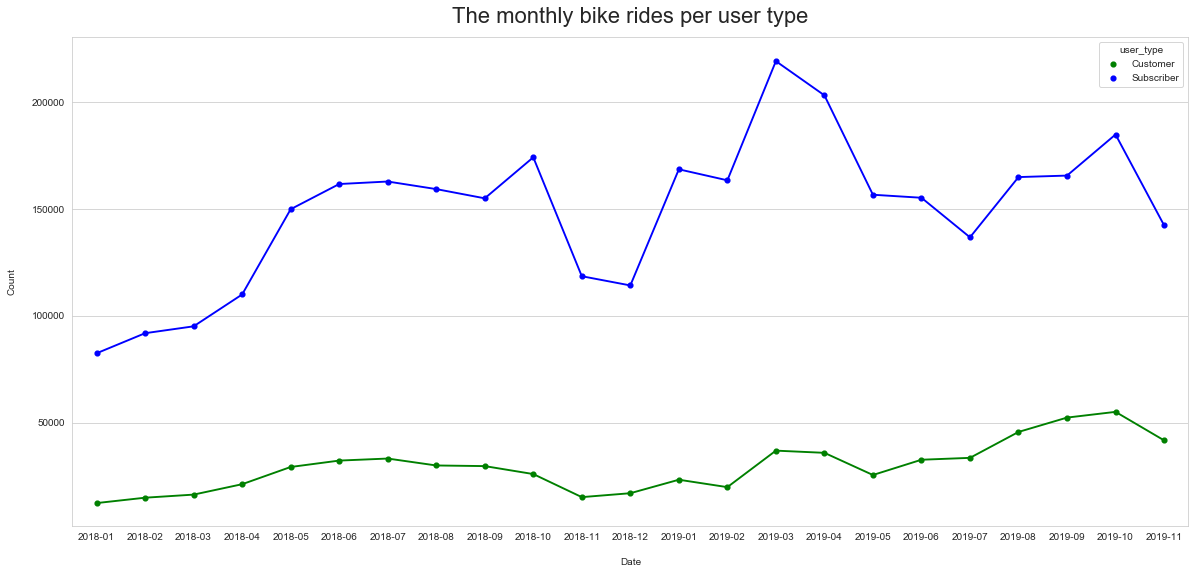

In [29]:
df_date_user = df_clean.groupby(["month_year", "user_type"]).size().reset_index()
plt.figure(figsize=(20,9))
palette = {'Subscriber':'blue', 'Customer':'green'}
sb.pointplot(x='month_year', y=0, hue='user_type', palette=palette, scale=.7, data=df_date_user)
plt.title('The monthly bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('Count', labelpad=16)